# Suicides in the world - Final project

Alina Eliovich 205947443 , Guy Montal 203319991



# introduction

In our project we will try to evaluate which feature has the most impact on the number of suicides.

# The Variables in the data are:

*	 country 
*	 year : from 1985 - 2016
*	 sex : male or female
*	 age : grouped age (15-24, 25-34, 35-54, 54-74, 75+)
*	 suicides_no : suicides count
*	 population : number of people who was residents in the country at this year
*	 suicides/100k pop : suicides count rescale
*	 country-year : country with year combine
*	 HDI for year : Human Development Index, the higher the better
*	 gdp_for_year : Gross Domestic Product
*	 gdp_per_capita : Gross Domestic Product rescale
*	 generation

In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

#  Data set:

In [2]:
#read the data frame And adjust a pisky coulomn, The variable 'gdp_for_year' should have numeric data type,
#but in here this variable have an object data type, we could have removed it in the Feature Encoding section, 
#but we learned this cool trick, so we added this below.
s_data = pd.read_csv("Suicide cases 1985-2016.csv",thousands=',')

In [3]:
s_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,country-year,HDI for year,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,Albania1987,NaN,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,Albania1987,NaN,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,Albania1987,NaN,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,Albania1987,NaN,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,Albania1987,NaN,2156624900,796,Boomers


In [4]:
s_data.dtypes

country                object
year                    int64
sex                    object
age                    object
suicides_no             int64
population              int64
suicides/100k pop     float64
country-year           object
HDI for year          float64
 gdp_for_year ($)       int64
gdp_per_capita ($)      int64
generation             object
dtype: object

If you look closely, We can see an inconsistency with the variable 'gdp_for_year' that has leading and trailing whitespaces. We clean this up using the lamba and strip() functions.

In [5]:
s_data.rename(columns=lambda x: x.strip(), inplace=True)
s_data.columns

Index(['country', 'year', 'sex', 'age', 'suicides_no', 'population',
       'suicides/100k pop', 'country-year', 'HDI for year', 'gdp_for_year ($)',
       'gdp_per_capita ($)', 'generation'],
      dtype='object')

#### Missing values&irrelevant values:

We also see that the columns country-year is just a combination of the Year and Country columns, therefore we'll remove it.
we also suspect that the column 'HDI for year' has some missing values, we'll check that too. 

In [6]:
s_data.isnull().sum()

country                   0
year                      0
sex                       0
age                       0
suicides_no               0
population                0
suicides/100k pop         0
country-year              0
HDI for year          19456
gdp_for_year ($)          0
gdp_per_capita ($)        0
generation                0
dtype: int64

19,456 missing values out of 27,820 in total is way too much, we can't replace this amount from our sources, so we decide to remove it too.

In [7]:
s_data.drop(['HDI for year','country-year'],axis=1,inplace=True)


In [8]:
s_data.head()

,country,year,sex,age,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),generation
0,Albania,1987,male,15-24 years,21,312900,6.71,2156624900,796,Generation X
1,Albania,1987,male,35-54 years,16,308000,5.19,2156624900,796,Silent
2,Albania,1987,female,15-24 years,14,289700,4.83,2156624900,796,Generation X
3,Albania,1987,male,75+ years,1,21800,4.59,2156624900,796,G.I. Generation
4,Albania,1987,male,25-34 years,9,274300,3.28,2156624900,796,Boomers


# Visualization of Data
We visualize data to uncover hidden patterns if any in the dataset

In order to start visualize our data and normallize for data mining, we will make a copy of our dataset for our convenience:

In [9]:
df = s_data.copy()

### Feature Encoding

Feature Encoding is important because We have to encode the values in such way that we can make numeric calculations on Object data type, it will also be crucial for our future classifier 

In [10]:
age_coder = {'5-14 years':0,
            '15-24 years':1,
            '25-34 years':2,
            '35-54 years':3,
            '55-74 years':4,
            '75+ years':5}
age = {0:'5-14 years',
      1:'15-24 years',
      2:'25-34 years',
      3:'35-54 years',
      4:'55-74 years',
      5:'75+ years'}
gender = {0:'female',1:'male'}

gender_coder = {'female':0,'male':1}

df['age_encoder'] = df['age'].map(age_coder)
df['sex_encoder'] = df['sex'].map(gender_coder)

### Lets have a look about the diversity in the group ages:

In [11]:
s_df = df.groupby('age_encoder')[['suicides_no']].sum()

C:\Users\Aline\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0, 0.5, 'Number of Suicide')

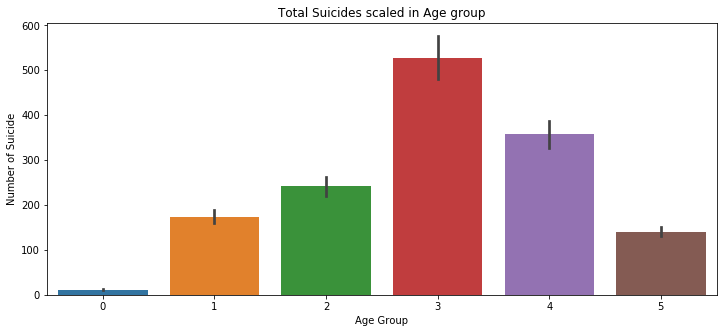

In [12]:
plt.figure(figsize=(12,5))
sns.barplot(x=df.age_encoder,y=df.suicides_no)
plt.title("Total Suicides scaled in Age group")
plt.xlabel("Age Group")
plt.ylabel("Number of Suicide")

### The most common age to commit suicide is between the ages of 35 to 54 (group 3)

In [13]:
generation_coder = {'G.I. Generation':0,
               'Silent':1,
               'Boomers':2, 
               'Generation X':3,
               'Millenials':4,
               'Generation Z':5}

df['generation_encoder'] = df['generation'].map(generation_coder)

df["generation"].value_counts()

Generation X       6408
Silent             6364
Millenials         5844
Boomers            4990
G.I. Generation    2744
Generation Z       1470
Name: generation, dtype: int64

### Lets have a look about the diversity in the Generation group:

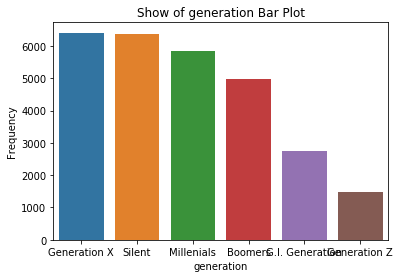

In [14]:
sns.barplot(x=df.generation.value_counts().index,y=df.generation.value_counts().values)
plt.xlabel('generation')
plt.ylabel('Frequency')
plt.title('Show of generation Bar Plot')
plt.show()

### Generation X and Silent generations are highest on the list of suicide cases.

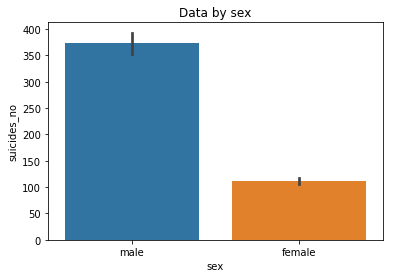

In [15]:
sns.barplot(x='sex' ,y='suicides_no', data=df)
plt.title('Data by sex')
plt.show()

### In this chart we can see men commit suicide a lot more than women

On a side note,it's intresting how many of those cases are homicide–suicide like so many stories we hear, mostly about a woman that has been killed by her husband and then he commited suicide. 

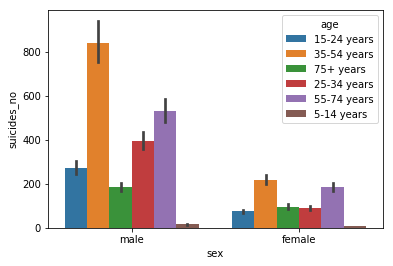

In [16]:
bar_age = sns.barplot(x='sex',y='suicides_no',hue='age',data=df)

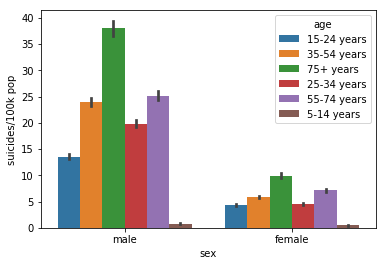

In [17]:
bar_age = sns.barplot(x='sex',y='suicides/100k pop',hue='age',data=df)

### Men and women in the group age of 75+ commit suicide more when you take the population at account, if you check only raw numbers of suicides per ages we get what we got on the first visualization.

We have a diffrence when we change the features suicides_no to suicides/100k pop, the 'suicides/100k pop' is a normalized feature, it describe the number of suicides in the spesific Generation, Age group and Sex and divide them by 100k population, this special ratio is very good for comparisons as we see here.

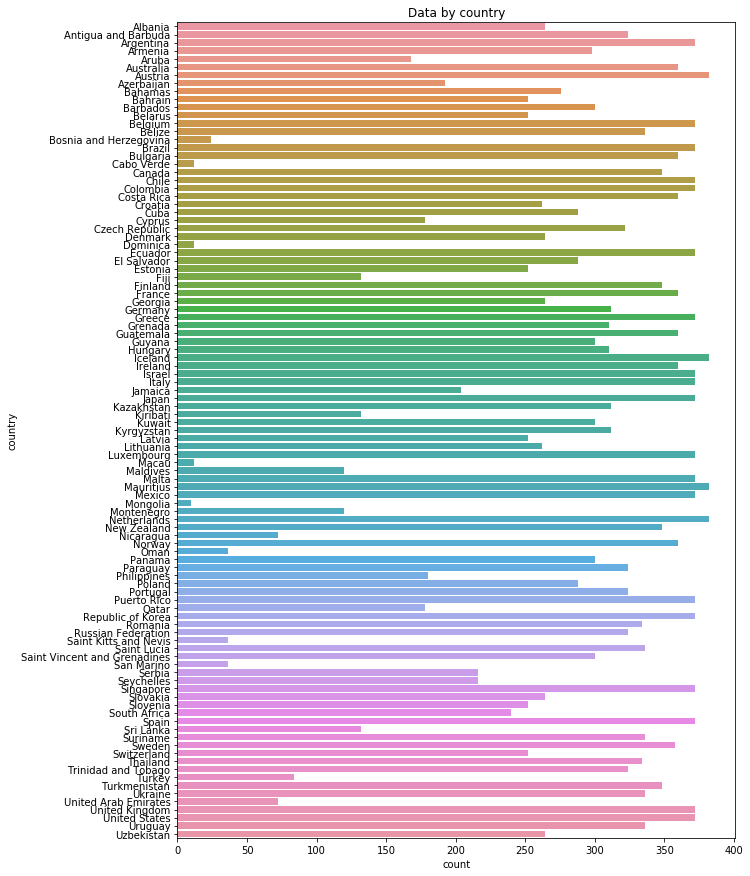

In [18]:
plt.figure(figsize=(10,15))
sns.countplot(y='country', data=df)
plt.title('Data by country')
plt.show()

### In this chart we can see how many cases are in the data-set per country.

Notice the low information/cases in some countries like : Macau, Mongolia, Dominica, Cabo Verde.

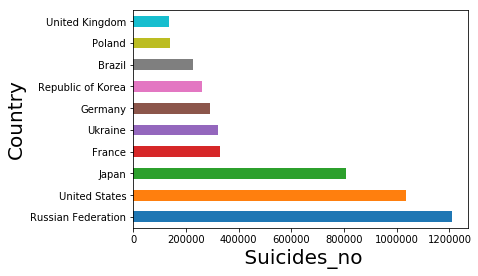

In [19]:
df.groupby(['country']).suicides_no.agg('sum').nlargest(10).plot(kind='barh')
plt.xlabel(' Suicides_no', size=20)
plt.ylabel('Country', fontsize=20);

### Russia and United States are the Leading in suicide cases when japan is not far behind in numbers.

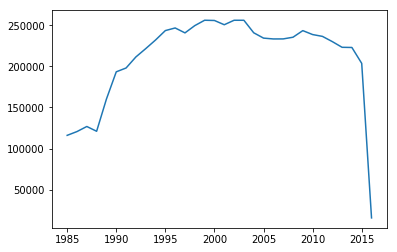

In [20]:
year = df.groupby(['year']).suicides_no.agg('sum')
plt.plot(year)

### We probably see the drop because the year haven't finished - So we will drop all the data from that year.

In [21]:
df = df[df.year != 2016]

## Calculating the correlation matrix:

In [22]:
df.corr()

,year,suicides_no,population,suicides/100k pop,gdp_for_year ($),gdp_per_capita ($),age_encoder,sex_encoder,generation_encoder
year,1.000000,-0.002953,0.011583,-0.039800,9.721988e-02,3.388544e-01,0.000000e+00,0.000000e+00,3.456830e-01
suicides_no,-0.002953,1.000000,0.616105,0.307103,4.300113e-01,6.216802e-02,8.026344e-02,1.447295e-01,-7.153050e-02
population,0.011583,0.616105,1.000000,0.008461,7.108339e-01,8.300605e-02,-6.038592e-02,-1.125721e-02,5.964161e-02
suicides/100k pop,-0.039800,0.307103,0.008461,1.000000,2.533403e-02,2.014606e-03,3.630638e-01,3.909192e-01,-3.360715e-01
gdp_for_year ($),0.097220,0.430011,0.710834,0.025334,1.000000e+00,3.048131e-01,2.269350e-19,0.000000e+00,3.412874e-02
gdp_per_capita ($),0.338854,0.062168,0.083006,0.002015,3.048131e-01,1.000000e+00,-5.716396e-19,7.879816e-19,1.163934e-01
age_encoder,0.000000,0.080263,-0.060386,0.363064,2.269350e-19,-5.716396e-19,1.000000e+00,0.000000e+00,-9.113722e-01
sex_encoder,0.000000,0.144729,-0.011257,0.390919,0.000000e+00,7.879816e-19,0.000000e+00,1.000000e+00,-8.573415e-19
generation_encoder,0.345683,-0.071531,0.059642,-0.336072,3.412874e-02,1.163934e-01,-9.113722e-01,-8.573415e-19,1.000000e+00


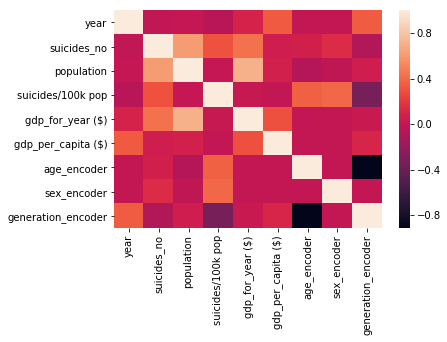

In [23]:
sns.heatmap(df.corr())
plt.show()

In [24]:
df['country'].unique()

array(['Albania', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Barbados', 'Belarus', 'Belgium', 'Belize',
       'Bosnia and Herzegovina', 'Brazil', 'Bulgaria', 'Cabo Verde',
       'Canada', 'Chile', 'Colombia', 'Costa Rica', 'Croatia', 'Cuba',
       'Cyprus', 'Czech Republic', 'Denmark', 'Dominica', 'Ecuador',
       'El Salvador', 'Estonia', 'Fiji', 'Finland', 'France', 'Georgia',
       'Germany', 'Greece', 'Grenada', 'Guatemala', 'Guyana', 'Hungary',
       'Iceland', 'Ireland', 'Israel', 'Italy', 'Jamaica', 'Japan',
       'Kazakhstan', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Latvia',
       'Lithuania', 'Luxembourg', 'Macau', 'Maldives', 'Malta',
       'Mauritius', 'Mexico', 'Montenegro', 'Netherlands', 'New Zealand',
       'Nicaragua', 'Norway', 'Oman', 'Panama', 'Paraguay', 'Philippines',
       'Poland', 'Portugal', 'Puerto Rico', 'Qatar', 'Republic of Korea',
       'Romania', 'Russian Fede

In [25]:
country_coder={'Albania':1, 'Antigua and Barbuda':2, 'Argentina':3, 'Armenia':4, 'Aruba':5,
       'Australia':6, 'Austria':7, 'Azerbaijan':8, 'Bahamas':9, 'Bahrain':10,
       'Barbados':11, 'Belarus':12, 'Belgium':13, 'Belize':14,
       'Bosnia and Herzegovina':15, 'Brazil':16, 'Bulgaria':17, 'Cabo Verde':18,
       'Canada':19, 'Chile':20, 'Colombia':21, 'Costa Rica':22, 'Croatia':23, 'Cuba':24,
       'Cyprus':25, 'Czech Republic':26, 'Denmark':27, 'Dominica':28, 'Ecuador':29,
       'El Salvador':30, 'Estonia':31, 'Fiji':32, 'Finland':33, 'France':34, 'Georgia':35,
       'Germany':36, 'Greece':37, 'Grenada':38, 'Guatemala':39, 'Guyana':40, 'Hungary':41,
       'Iceland':42, 'Ireland':43, 'Israel':44, 'Italy':45, 'Jamaica':46, 'Japan':47,
       'Kazakhstan':47, 'Kiribati':49, 'Kuwait':50, 'Kyrgyzstan':51, 'Latvia':52,
       'Lithuania':53, 'Luxembourg':54, 'Macau':55, 'Maldives':56, 'Malta':57,
       'Mauritius':58, 'Mexico':59, 'Montenegro':60, 'Netherlands':61, 'New Zealand':62,
       'Nicaragua':63, 'Norway':64, 'Oman':65, 'Panama':66, 'Paraguay':67, 'Philippines':68,
       'Poland':69, 'Portugal':70, 'Puerto Rico':71, 'Qatar':72, 'Republic of Korea':73,
       'Romania':74, 'Russian Federation':75, 'Saint Kitts and Nevis':76,
       'Saint Lucia':77, 'Saint Vincent and Grenadines':78, 'San Marino':79,
       'Serbia':80, 'Seychelles':81, 'Singapore':82, 'Slovakia':83, 'Slovenia':84,
       'South Africa':85, 'Spain':86, 'Sri Lanka':87, 'Suriname':88, 'Sweden':89,
       'Switzerland':90, 'Thailand':91, 'Trinidad and Tobago':92, 'Turkey':93,
       'Turkmenistan':94, 'Ukraine':95, 'United Arab Emirates':96,
       'United Kingdom':97, 'United States':98, 'Uruguay':99, 'Uzbekistan':100}



df['country_coder'] = df['country'].map(country_coder)


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27660 entries, 0 to 27819
Data columns (total 14 columns):
country               27660 non-null object
year                  27660 non-null int64
sex                   27660 non-null object
age                   27660 non-null object
suicides_no           27660 non-null int64
population            27660 non-null int64
suicides/100k pop     27660 non-null float64
gdp_for_year ($)      27660 non-null int64
gdp_per_capita ($)    27660 non-null int64
generation            27660 non-null object
age_encoder           27660 non-null int64
sex_encoder           27660 non-null int64
generation_encoder    27660 non-null int64
country_coder         27660 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 3.2+ MB


After finishing visualiztions we will remove two featurs : 'suicide_no' and 'population' that were important for our study but has zero connection into the question "What feature if any, has more effect on suicides rate?".

In [27]:
df.drop(['suicides_no','population'],axis=1,inplace=True)

# Regression

In [28]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [29]:
list(df)

['country',
 'year',
 'sex',
 'age',
 'suicides/100k pop',
 'gdp_for_year ($)',
 'gdp_per_capita ($)',
 'generation',
 'age_encoder',
 'sex_encoder',
 'generation_encoder',
 'country_coder']

## First we'll start by Linear Regression. We divide the dataset into testing and training dataset:

## Linear regression

In [30]:
Y = df["suicides/100k pop"]
X = df.drop(['country','sex','generation','age','suicides/100k pop'],axis=1)


In [31]:
x_train, x_test, y_train, y_test = train_test_split(X,Y, test_size =0.3, random_state=42)

In [32]:
reg = LinearRegression()
reg.fit(x_train,y_train)
ypred = reg.predict(x_test)
acc_score = reg.score(x_test,y_test)
print('LINEAR REGRESSION:')
print('Accuracy Score is: {}'.format(acc_score))

LINEAR REGRESSION:
Accuracy Score is: 0.293420710366181


In [33]:
print('Mean Squared Error:')
print(('Value : %.10f' % mean_squared_error(y_test,ypred)))

Mean Squared Error:
Value : 266.5543580164


In [34]:
feature_importances = pd.DataFrame(reg.coef_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
feature_importances

,importance
sex_encoder,1.467078e+01
age_encoder,5.541947e+00
generation_encoder,2.091674e+00
country_coder,3.393494e-02
gdp_per_capita ($),1.187118e-05
gdp_for_year ($),2.552846e-13
year,-2.301469e-01


Text(0, 0.5, 'Predictions')

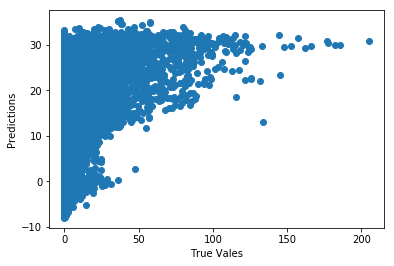

In [35]:
plt.scatter(y_test, ypred)
plt.xlabel("True Vales",)
plt.ylabel("Predictions")

In [36]:
print('Coefficients: \n', reg.coef_)
# Explained variance score: 1 is perfect prediction
print('Variance score: %.2f' % r2_score(y_test, ypred))

Coefficients: 
 [-2.30146932e-01  2.55284645e-13  1.18711751e-05  5.54194723e+00
  1.46707799e+01  2.09167403e+00  3.39349371e-02]
Variance score: 0.29


In [37]:
y = df["age_encoder"]
x = df.drop(['country','generation','age','sex','age_encoder'],axis=1)


In [38]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(x,y, test_size =0.3, random_state=42)

In [39]:
reg = LinearRegression()
reg.fit(x_train1,y_train1)
ypred = reg.predict(x_test1)
acc_score = reg.score(x_test1,y_test1)
print('LINEAR REGRESSION:')
print('Accuracy Score is: {}'.format(acc_score))

LINEAR REGRESSION:
Accuracy Score is: 0.9436608385672096


In [40]:
feature_importances = pd.DataFrame(reg.coef_,index = x_train1.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                      importance
year                7.224856e-02
suicides/100k pop   3.569227e-03
gdp_for_year ($)    1.194722e-17
gdp_per_capita ($) -2.083676e-07
country_coder      -1.834151e-04
sex_encoder        -5.276607e-02
generation_encoder -1.227627e+00


Text(0, 0.5, 'Predictions')

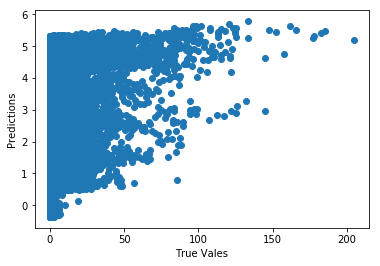

In [41]:
plt.scatter(y_test, ypred)
plt.xlabel("True Vales",)
plt.ylabel("Predictions")

### Linear regression setting can make the model extremely sensitive to noise in the data
#### So, we'll try Random Forest Regressor algorithem

## Random Forest Regressor

In [42]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

clf_rf = RandomForestRegressor()
clf_rf.fit(x_train , y_train)
accuracies = cross_val_score(estimator = clf_rf, X = x_train, y = y_train, cv = 8,verbose = 1)
ypred = clf_rf.predict(x_test)

print('Random Forest Regressor:')
print('Value : %.10f' % clf_rf.score(x_test, y_test))

C:\Users\Aline\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Random Forest Regressor:
Value : 0.8664533599


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:    4.3s finished


In [43]:
print('Mean Squared Error:')
print(('Value : %.10f' % mean_squared_error(y_test,ypred)))

Mean Squared Error:
Value : 50.3799636222


In [44]:
feature_importances = pd.DataFrame(clf_rf.feature_importances_,index = x_train.columns,columns=['importance']).sort_values('importance',ascending=False)
print(feature_importances)

                    importance
country_coder         0.294355
age_encoder           0.196692
gdp_for_year ($)      0.172428
sex_encoder           0.151291
gdp_per_capita ($)    0.109214
year                  0.063779
generation_encoder    0.012241


## Results of regression:
* Linear regression : 29%
* Random Forest Regressor : 86%

## Conclution : 

#### The feature with the most effect is the country which the person was from.
#### when country as a prime aspect and gdp in high place as well we suspect that a big part of people commiting suicide is when they are in low conditions in their state.